# Groundwater Level Prediction with Machine Learning Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Loading Data

In [ ]:
data_path = r'/content/drive/MyDrive/HIL/HIL_gwl_v2.csv'
data = pd.read_csv(data_path,index_col='date')
data.index = pd.to_datetime(data.index)

In [ ]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light
date,,,,,,,
2023-01-01,102,9.23250,21.9,0.2,2.53,12.36,39054.18
2023-01-02,108,9.37075,20.7,0.3,2.47,12.29,39073.20
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61
...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34


<Figure size 1200x600 with 0 Axes>

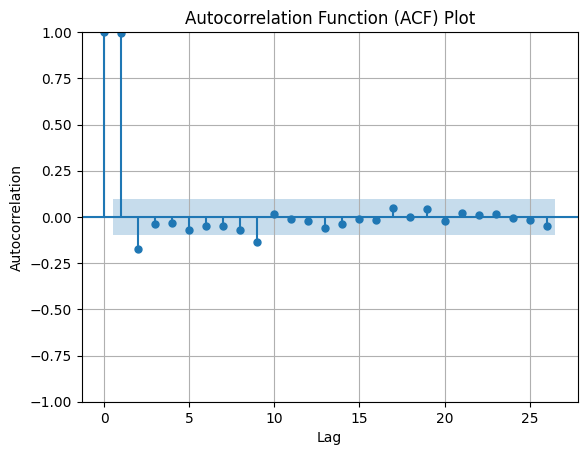

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(data['level (m)'])  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
data['weekday'] = data.index.weekday.values

In [ ]:
data['lag_1'] = data['level (m)'].shift(1)


In [ ]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-01,102,9.23250,21.9,0.2,2.53,12.36,39054.18,6,NaN
2023-01-02,108,9.37075,20.7,0.3,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
...,...,...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74,5,10.99500
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66,6,11.08250
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34,0,11.24250


In [ ]:
data.dropna(inplace=True)

### Final Dataset

In [ ]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-02,108,9.37075,20.7,0.3,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
2023-01-06,74,9.60000,18.3,0.0,4.34,16.07,39166.38,4,9.55625
...,...,...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74,5,10.99500
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66,6,11.08250
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34,0,11.24250


### Separating Data into Training and Testing set

In [ ]:
predictors = [col for col in data.columns if col not in ['level (m)']]
target = 'level (m)'

In [ ]:
X = data[predictors]
y = data[target]

In [ ]:
len(X),len(y)

(395, 395)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
len(X_train),len(X_test)

(355, 40)

In [ ]:
X_train.shape

(355, 8)

# MLR Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)

# Make predictions
y_pred_train_mlr = model_mlr.predict(X_train)
y_pred_test_mlr = model_mlr.predict(X_test)


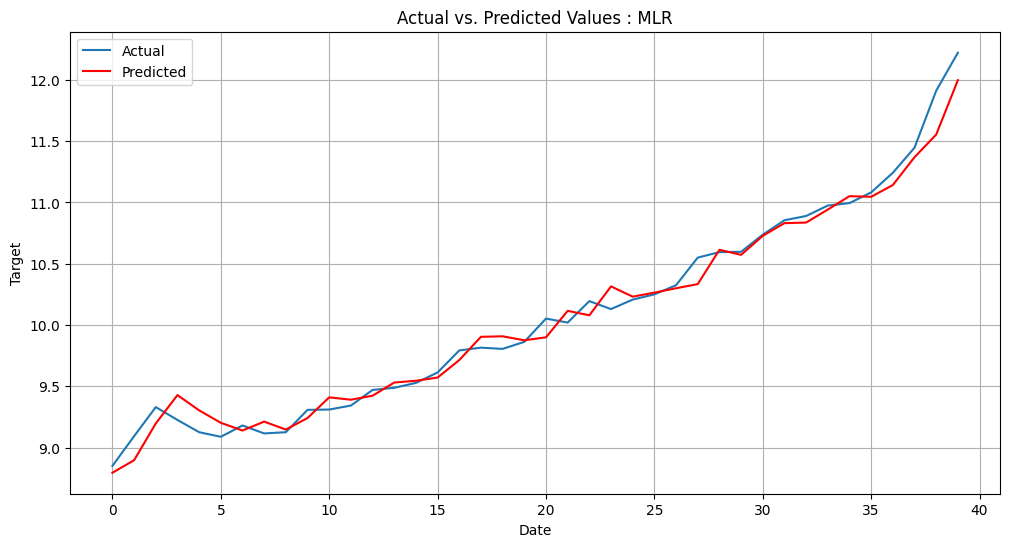

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_mlr, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values : MLR')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


### MLR Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_mlr = mean_squared_error(y_train, y_pred_train_mlr)
mse_test_mlr = mean_squared_error(y_test, y_pred_test_mlr)

# Calculate RMSE
rmse_train_mlr = np.sqrt(mse_train_mlr)
rmse_test_mlr = np.sqrt(mse_test_mlr)

# Calculate R²
r2_train_mlr = r2_score(y_train, y_pred_train_mlr)
r2_test_mlr = r2_score(y_test, y_pred_test_mlr)

# Calculate MAE
mae_train_mlr = mean_absolute_error(y_train, y_pred_train_mlr)
mae_test_mlr = mean_absolute_error(y_test, y_pred_test_mlr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_mlr = mean_absolute_percentage_error(y_train, y_pred_train_mlr)
mape_test_mlr = mean_absolute_percentage_error(y_test, y_pred_test_mlr)

# Print the metrics
print(f'Training MSE: {mse_train_mlr}')
print(f'Testing MSE: {mse_test_mlr}')
print(f'Training RMSE: {rmse_train_mlr}')
print(f'Testing RMSE: {rmse_test_mlr}')
print(f'Training R²: {r2_train_mlr}')
print(f'Testing R²: {r2_test_mlr}')
print(f'Training MAE: {mae_train_mlr}')
print(f'Testing MAE: {mae_test_mlr}')
print(f'Training MAPE: {mape_train_mlr}')
print(f'Testing MAPE: {mape_test_mlr}')


Training MSE: 0.032569747915457074
Testing MSE: 0.013435169714660527
Training RMSE: 0.18047090600830118
Testing RMSE: 0.11591017951267493
Training R²: 0.9964063947667771
Testing R²: 0.98078245766701
Training MAE: 0.11155390984606856
Testing MAE: 0.0882719275766712
Training MAPE: 1.3213956701601062
Testing MAPE: 0.8745751939398922


# Cross-Validation  MLR

In [ ]:
from sklearn.model_selection import TimeSeriesSplit


# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics for each split
mlr_rmse_scores = []

# Perform Time Series Cross-Validation
for train_idx, test_idx in tscv.split(X):
    # Split data into training and testing sets for this split
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Train Linear Regression model on training set
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    # Predict on testing set
    y_pred = model.predict(X_test_cv)

    # Compute RMSE for this split
    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    mlr_rmse_scores.append(rmse)

# Calculate average RMSE across all splits
average_rmse = np.mean(mlr_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 0.2185960928531368


# RFR Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest Regressor model
rfr_model = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfr_model, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
best_params_rfr = {'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

model_rfr = RandomForestRegressor(**best_params_rfr, random_state=42)
model_rfr.fit(X_train, y_train)

y_pred_train_rfr = model_rfr.predict(X_train)
y_pred_test_rfr = model_rfr.predict(X_test)

### RER Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(y_test, y_pred_test_rfr)

# Calculate RMSE
rmse_train_rfr = np.sqrt(mse_train_rfr)
rmse_test_rfr = np.sqrt(mse_test_rfr)

# Calculate R²
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)
r2_test_rfr = r2_score(y_test, y_pred_test_rfr)

# Calculate MAE
mae_train_rfr = mean_absolute_error(y_train, y_pred_train_rfr)
mae_test_rfr = mean_absolute_error(y_test, y_pred_test_rfr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_rfr = mean_absolute_percentage_error(y_train, y_pred_train_rfr)
mape_test_rfr = mean_absolute_percentage_error(y_test, y_pred_test_rfr)

# Print the metrics
print(f'Training MSE: {mse_train_rfr}')
print(f'Testing MSE: {mse_test_rfr}')
print(f'Training RMSE: {rmse_train_rfr}')
print(f'Testing RMSE: {rmse_test_rfr}')
print(f'Training R²: {r2_train_rfr}')
print(f'Testing R²: {r2_test_rfr}')
print(f'Training MAE: {mae_train_rfr}')
print(f'Testing MAE: {mae_test_rfr}')
print(f'Training MAPE: {mape_train_rfr}')
print(f'Testing MAPE: {mape_test_rfr}')


Training MSE: 0.01995175063778102
Testing MSE: 0.040497112827434845
Training RMSE: 0.1412506659728761
Testing RMSE: 0.20123894460922528
Training R²: 0.9977986100570996
Testing R²: 0.9420733048667138
Training MAE: 0.08736811172341238
Testing MAE: 0.16334624276376658
Training MAPE: 1.0172426203260116
Testing MAPE: 1.6165209193868288


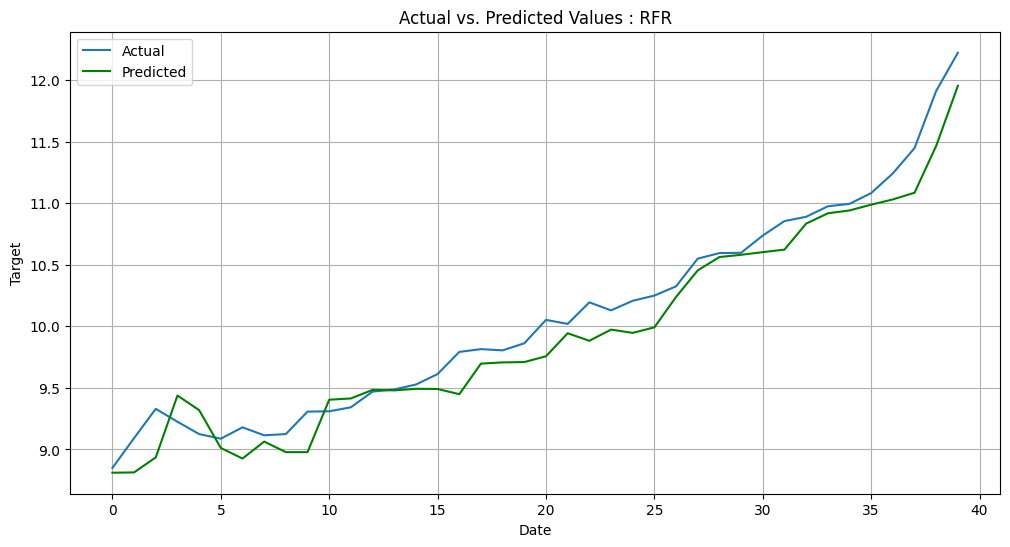

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_rfr, label='Predicted', color='green')
plt.title('Actual vs. Predicted Values : RFR')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


# Cross-Validation RFR

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming X and y are your features and target variable

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics for each split
rfr_rmse_scores = []

# Perform Time Series Cross-Validation
for train_idx, test_idx in tscv.split(X):
    # Split data into training and testing sets for this split
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    best_params_rfr = {'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

    model_rfr = RandomForestRegressor(**best_params_rfr, random_state=42)
    model_rfr.fit(X_train_cv, y_train_cv)
    # Predict on testing set
    y_pred = model_rfr.predict(X_test_cv)

    # Compute RMSE for this split
    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    rfr_rmse_scores.append(rmse)

# Calculate average RMSE across all splits
average_rmse = np.mean(rfr_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 1.0390015234447088


# XGB Training

In [ ]:
import xgboost as xgb

In [ ]:

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV with XGBRegressor and TimeSeriesSplit
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

model_xgbr = xgb.XGBRegressor(**best_params,objective='reg:squarederror', n_estimators=1000)
model_xgbr.fit(X_train, y_train)

# Make predictions
y_pred_train_xgbr = model_xgbr.predict(X_train)
y_pred_test_xgbr = model_xgbr.predict(X_test)


In [ ]:
best_params = {'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.6}

model_xgbr = xgb.XGBRegressor(**best_params,objective='reg:squarederror', n_estimators=1000)
model_xgbr.fit(X_train, y_train)

# Make predictions
y_pred_train_xgbr = model_xgbr.predict(X_train)
y_pred_test_xgbr = model_xgbr.predict(X_test)

### XGB Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_xgbr = mean_squared_error(y_train, y_pred_train_xgbr)
mse_test_xgbr = mean_squared_error(y_test, y_pred_test_xgbr)

# Calculate RMSE
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)

# Calculate R²
r2_train_xgbr = r2_score(y_train, y_pred_train_xgbr)
r2_test_xgbr = r2_score(y_test, y_pred_test_xgbr)

# Calculate MAE
mae_train_xgbr = mean_absolute_error(y_train, y_pred_train_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, y_pred_test_xgbr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_xgbr = mean_absolute_percentage_error(y_train, y_pred_train_xgbr)
mape_test_xgbr = mean_absolute_percentage_error(y_test, y_pred_test_xgbr)

# Print the metrics
print(f'Training MSE: {mse_train_xgbr}')
print(f'Testing MSE: {mse_test_xgbr}')
print(f'Training RMSE: {rmse_train_xgbr}')
print(f'Testing RMSE: {rmse_test_xgbr}')
print(f'Training R²: {r2_train_xgbr}')
print(f'Testing R²: {r2_test_xgbr}')
print(f'Training MAE: {mae_train_xgbr}')
print(f'Testing MAE: {mae_test_xgbr}')
print(f'Training MAPE: {mape_train_xgbr}')
print(f'Testing MAPE: {mape_test_xgbr}')


Training MSE: 2.0482613403607764e-07
Testing MSE: 0.0843594807281427
Training RMSE: 0.0004525772133416326
Testing RMSE: 0.2904470360119771
Training R²: 0.9999999774003695
Testing R²: 0.8793329800431855
Training MAE: 0.0003609637484943717
Testing MAE: 0.23850714969635006
Training MAPE: 0.004104684133933086
Testing MAPE: 2.306869473206051


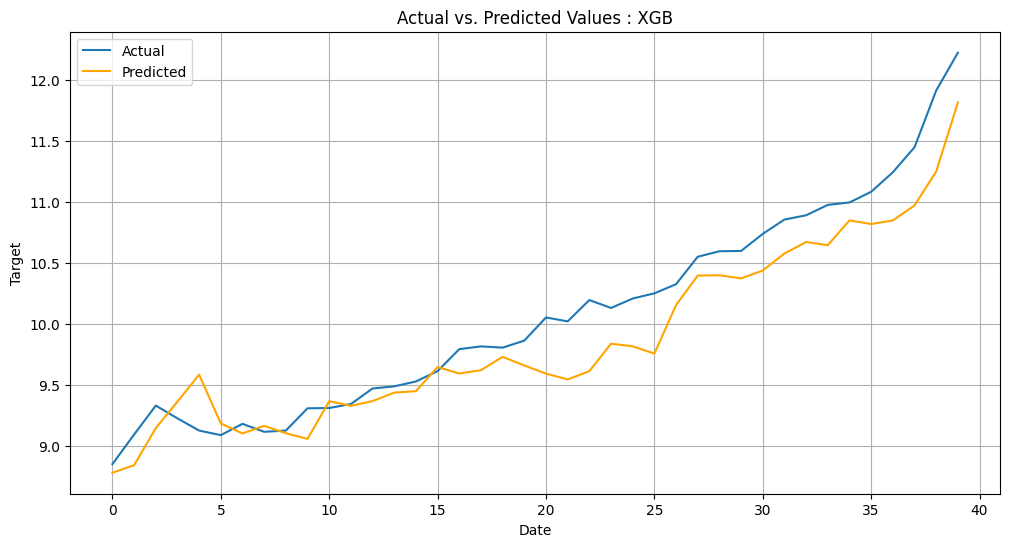

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_xgbr, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Values : XGB')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


# Cross-validation XGB

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming X and y are your features and target variable

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics for each split
xg_rmse_scores = []

# Perform Time Series Cross-Validation
for train_idx, test_idx in tscv.split(X):
    # Split data into training and testing sets for this split
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    best_params = {'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.6}

    model_xgbr = xgb.XGBRegressor(**best_params,objective='reg:squarederror', n_estimators=1000)
    model_xgbr.fit(X_train_cv, y_train_cv)
    # Predict on testing set
    y_pred = model_xgbr.predict(X_test_cv)

    # Compute RMSE for this split
    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    xg_rmse_scores.append(rmse)

# Calculate average RMSE across all splits
average_rmse = np.mean(xg_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 1.2111191908093697
